In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Importing and read dataset

df=pd.read_csv("weather1.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Selects specific columns from the DataFrame 'df' and 
# collects their values into 'X'

X=df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, nan, ..., 15.0, 20.9, 'No']], dtype=object)

In [4]:
Y=df.iloc[:,21:].values
Y


array([['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ...,
       ['No', 'No'],
       ['No', 'No'],
       ['No', nan]], dtype=object)

In [5]:

Y = df['RainTomorrow'].values.reshape(-1, 1)

In [6]:
#Dealing with invalid datasets
# Simpleimputer

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
Y=imputer.fit_transform(Y)

In [7]:
print(X)
print('\n-------------------\n')
print(Y)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]

-------------------

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [8]:
# Encoding DataSet
# Sklearn for preprocessing

le1 = LabelEncoder()
X[:, 0] = le1.fit_transform(X[:, 0])

le2 = LabelEncoder()
X[:, 4] = le2.fit_transform(X[:, 4])

le3 = LabelEncoder()
X[:, 6] = le3.fit_transform(X[:, 6])

le4 = LabelEncoder()
X[:, 7] = le4.fit_transform(X[:, 7])

le5 = LabelEncoder()
X[:, -1] = le5.fit_transform(X[:, -1])

le6 = LabelEncoder()
Y = le6.fit_transform(Y.ravel())  # Use ravel() to convert Y to 1D array

In [9]:
print(X)
print('\n-------------------\n')
print(Y)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]

-------------------

[0 0 0 ... 0 0 0]


In [10]:
#Features Scaling
#  StandardScaler   Range:(-3 to 3)

'''
StandardScaler standardizes features to have a mean of 0 and a standard deviation of 1. 
This aids machine learning by mitigating scale-related issues, enhancing convergence,
and ensuring fair feature contributions.
The (-3 to 3) range isn't a strict outcome but illustrates general scaling impact.

'''
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


In [11]:
#Splitting datasets into Training set and test set
# Use Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [13]:
print(Y_train)

[1 0 0 ... 0 0 0]


In [14]:
#Training Model
# Classify

classifier = RandomForestClassifier(n_estimators=150, random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [15]:
# Check Accuracy
classifier.score(X_train,Y_train)

0.9999398460057748

In [16]:
Y_pred = classifier.predict(X_test)
Y_pred = Y_pred.reshape(-1, 1)  # Reshape to match the shape of Y

In [17]:
print(Y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [18]:
Y_pred=le6.inverse_transform(Y_pred)

C:\Users\biraj\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(Y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [20]:
print(Y_test)

[1 1 0 ... 1 0 0]


In [21]:
Y_test=le6.inverse_transform(Y_test)

In [22]:
print(Y_test)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [23]:
Y_test=Y_test.reshape(-1,1)
Y_pred=Y_pred.reshape(-1,1)

In [24]:
data = np.concatenate((Y_test, Y_pred), axis=1)
dataframe = pd.DataFrame(data, columns=["Rain on Tomorrow", "Prediction of Rain"])
print(data)

[['Yes' 'No']
 ['Yes' 'No']
 ['No' 'No']
 ...
 ['Yes' 'No']
 ['No' 'No']
 ['No' 'No']]


In [25]:
print(dataframe)

      Rain on Tomorrow Prediction of Rain
0                  Yes                 No
1                  Yes                 No
2                   No                 No
3                   No                Yes
4                   No                 No
...                ...                ...
29087               No                Yes
29088               No                 No
29089              Yes                 No
29090               No                 No
29091               No                 No

[29092 rows x 2 columns]


In [26]:
dataframe.to_csv('prediction.csv')

In [27]:
# Calculating Accuracy
accuracy_score(Y_test,Y_pred)


0.8538086071772308

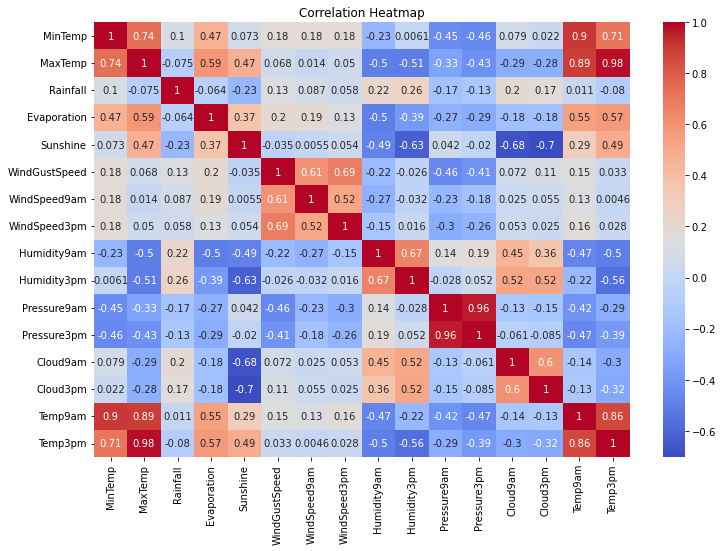

In [28]:
# Correlation Heatmap using Seaborn
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

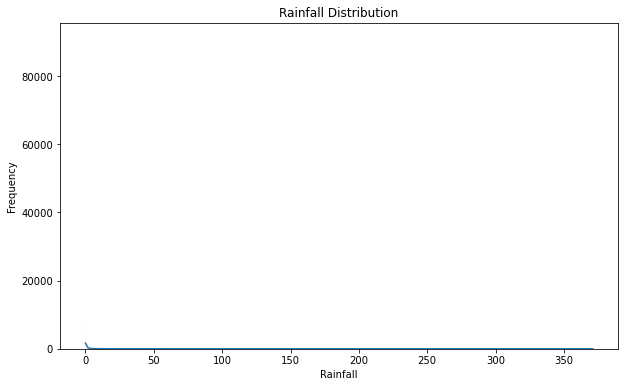

In [29]:
# Histogram of Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], kde=True)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.show()

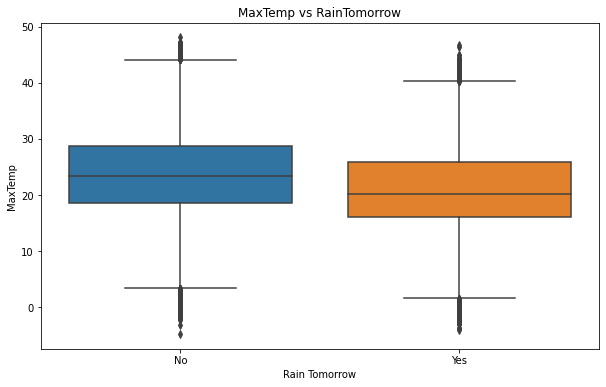

In [30]:
# Boxplot of MaxTemp vs RainTomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df)
plt.title("MaxTemp vs RainTomorrow")
plt.xlabel("Rain Tomorrow")
plt.ylabel("MaxTemp")
plt.show()

In [ ]:
# Countplot of RainTomorrow
plt.figure(figsize=(6, 4))
sns.countplot(x="RainTomorrow", data=df)
plt.title("Count of RainTomorrow")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.show()

In [ ]:
# Boxplot of Humidity3pm vs RainTomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title("Humidity3pm vs RainTomorrow")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Humidity3pm")
plt.show()

In [ ]:
# Histogram of WindGustSpeed
plt.figure(figsize=(10, 6))
sns.histplot(df['WindGustSpeed'], kde=True)
plt.title("WindGustSpeed Distribution")
plt.xlabel("WindGustSpeed")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Scatterplot of MaxTemp vs MinTemp using Plotly
fig = px.scatter(df, x="MinTemp", y="MaxTemp", color="RainTomorrow")
fig.update_layout(title="Scatterplot of MaxTemp vs MinTemp")
fig.show()
